In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(df.columns)
print(df.shape)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(1599, 12)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [8]:
df.duplicated().sum()

240

In [9]:
sns.set(style="whitegrid")
print(df['quality'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('quality', data=df, palette='pastel')

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


TypeError: countplot() got multiple values for argument 'data'

<Figure size 1000x600 with 0 Axes>

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

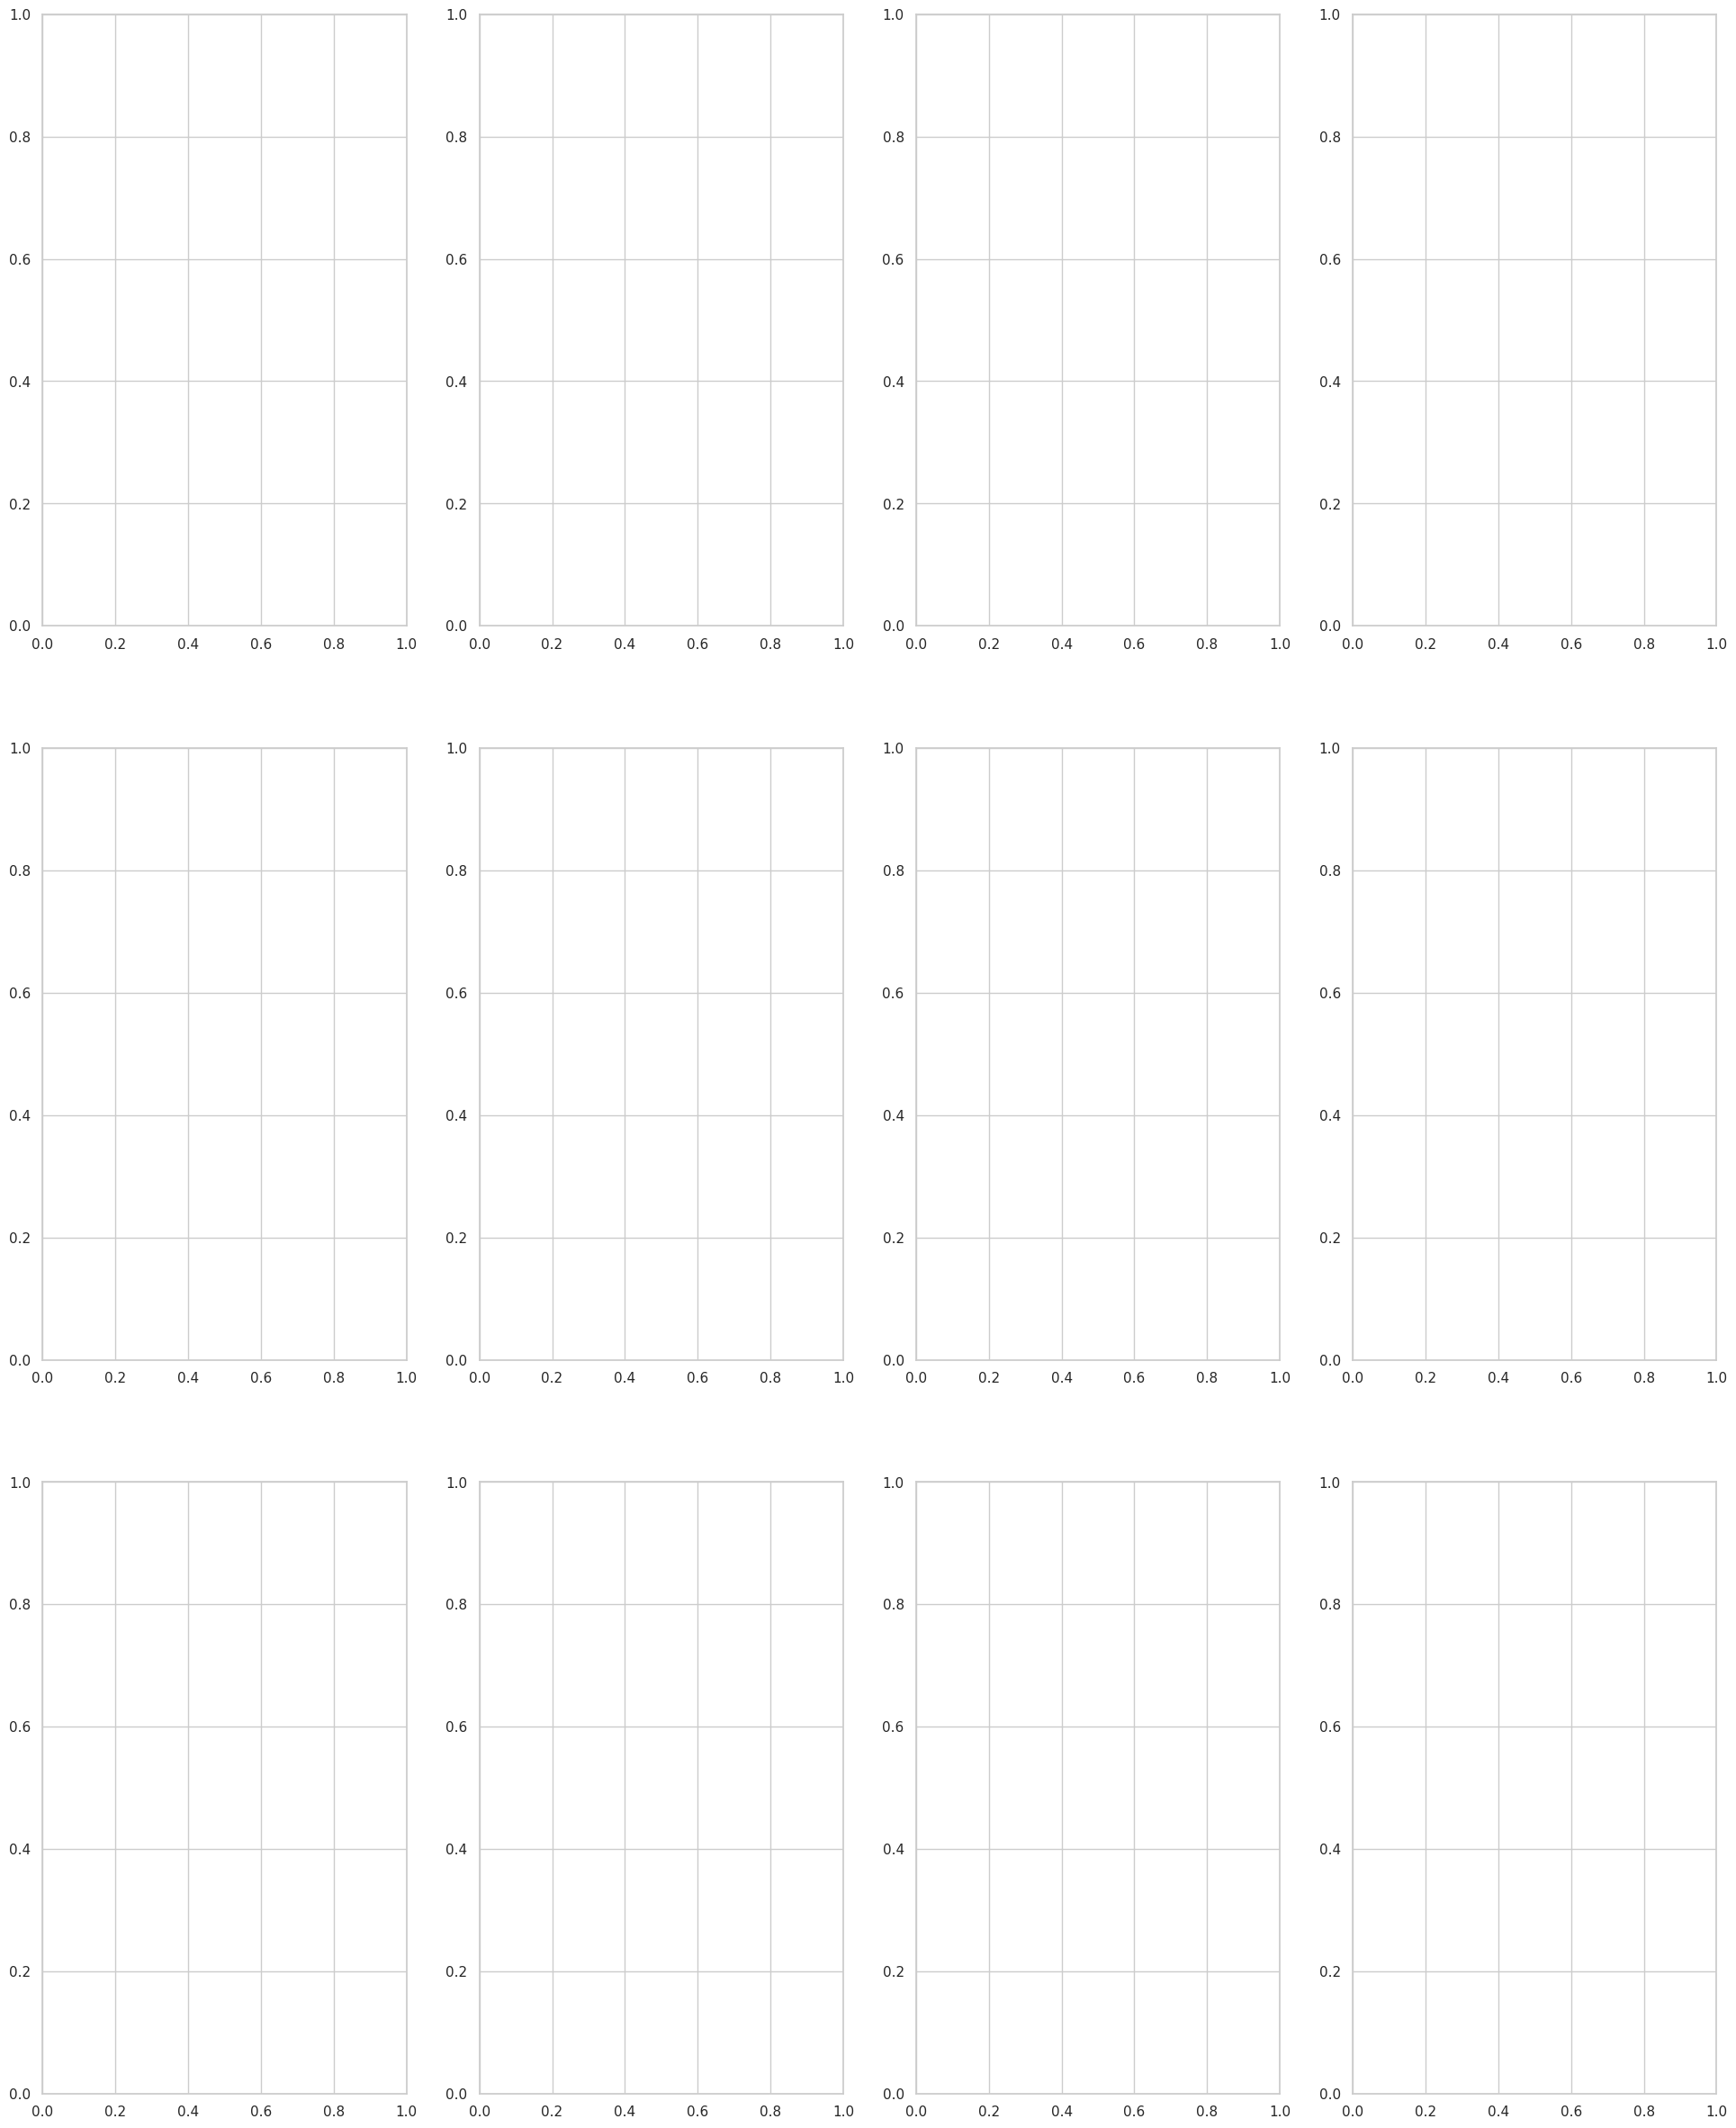

In [10]:
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.boxplot(df['quality'], df[columns[k]], ax = ax1[i][j], palette='pastel')
            k += 1
plt.show()

<Axes: >

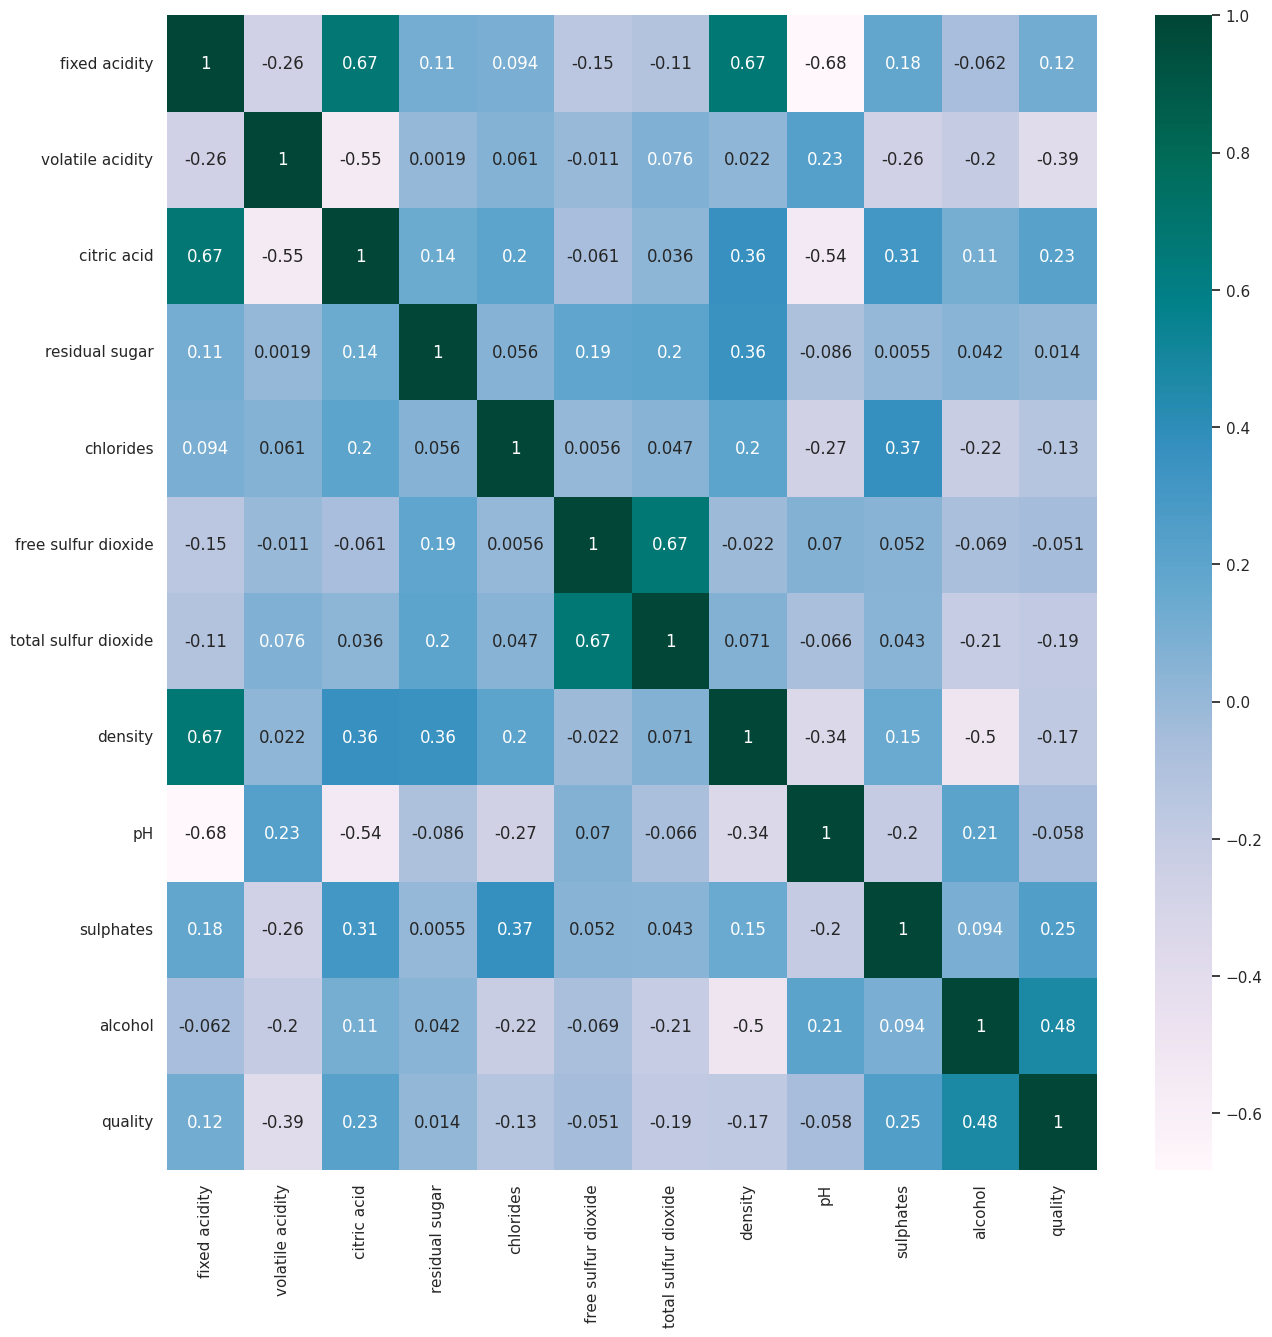

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cmap= 'PuBuGn')

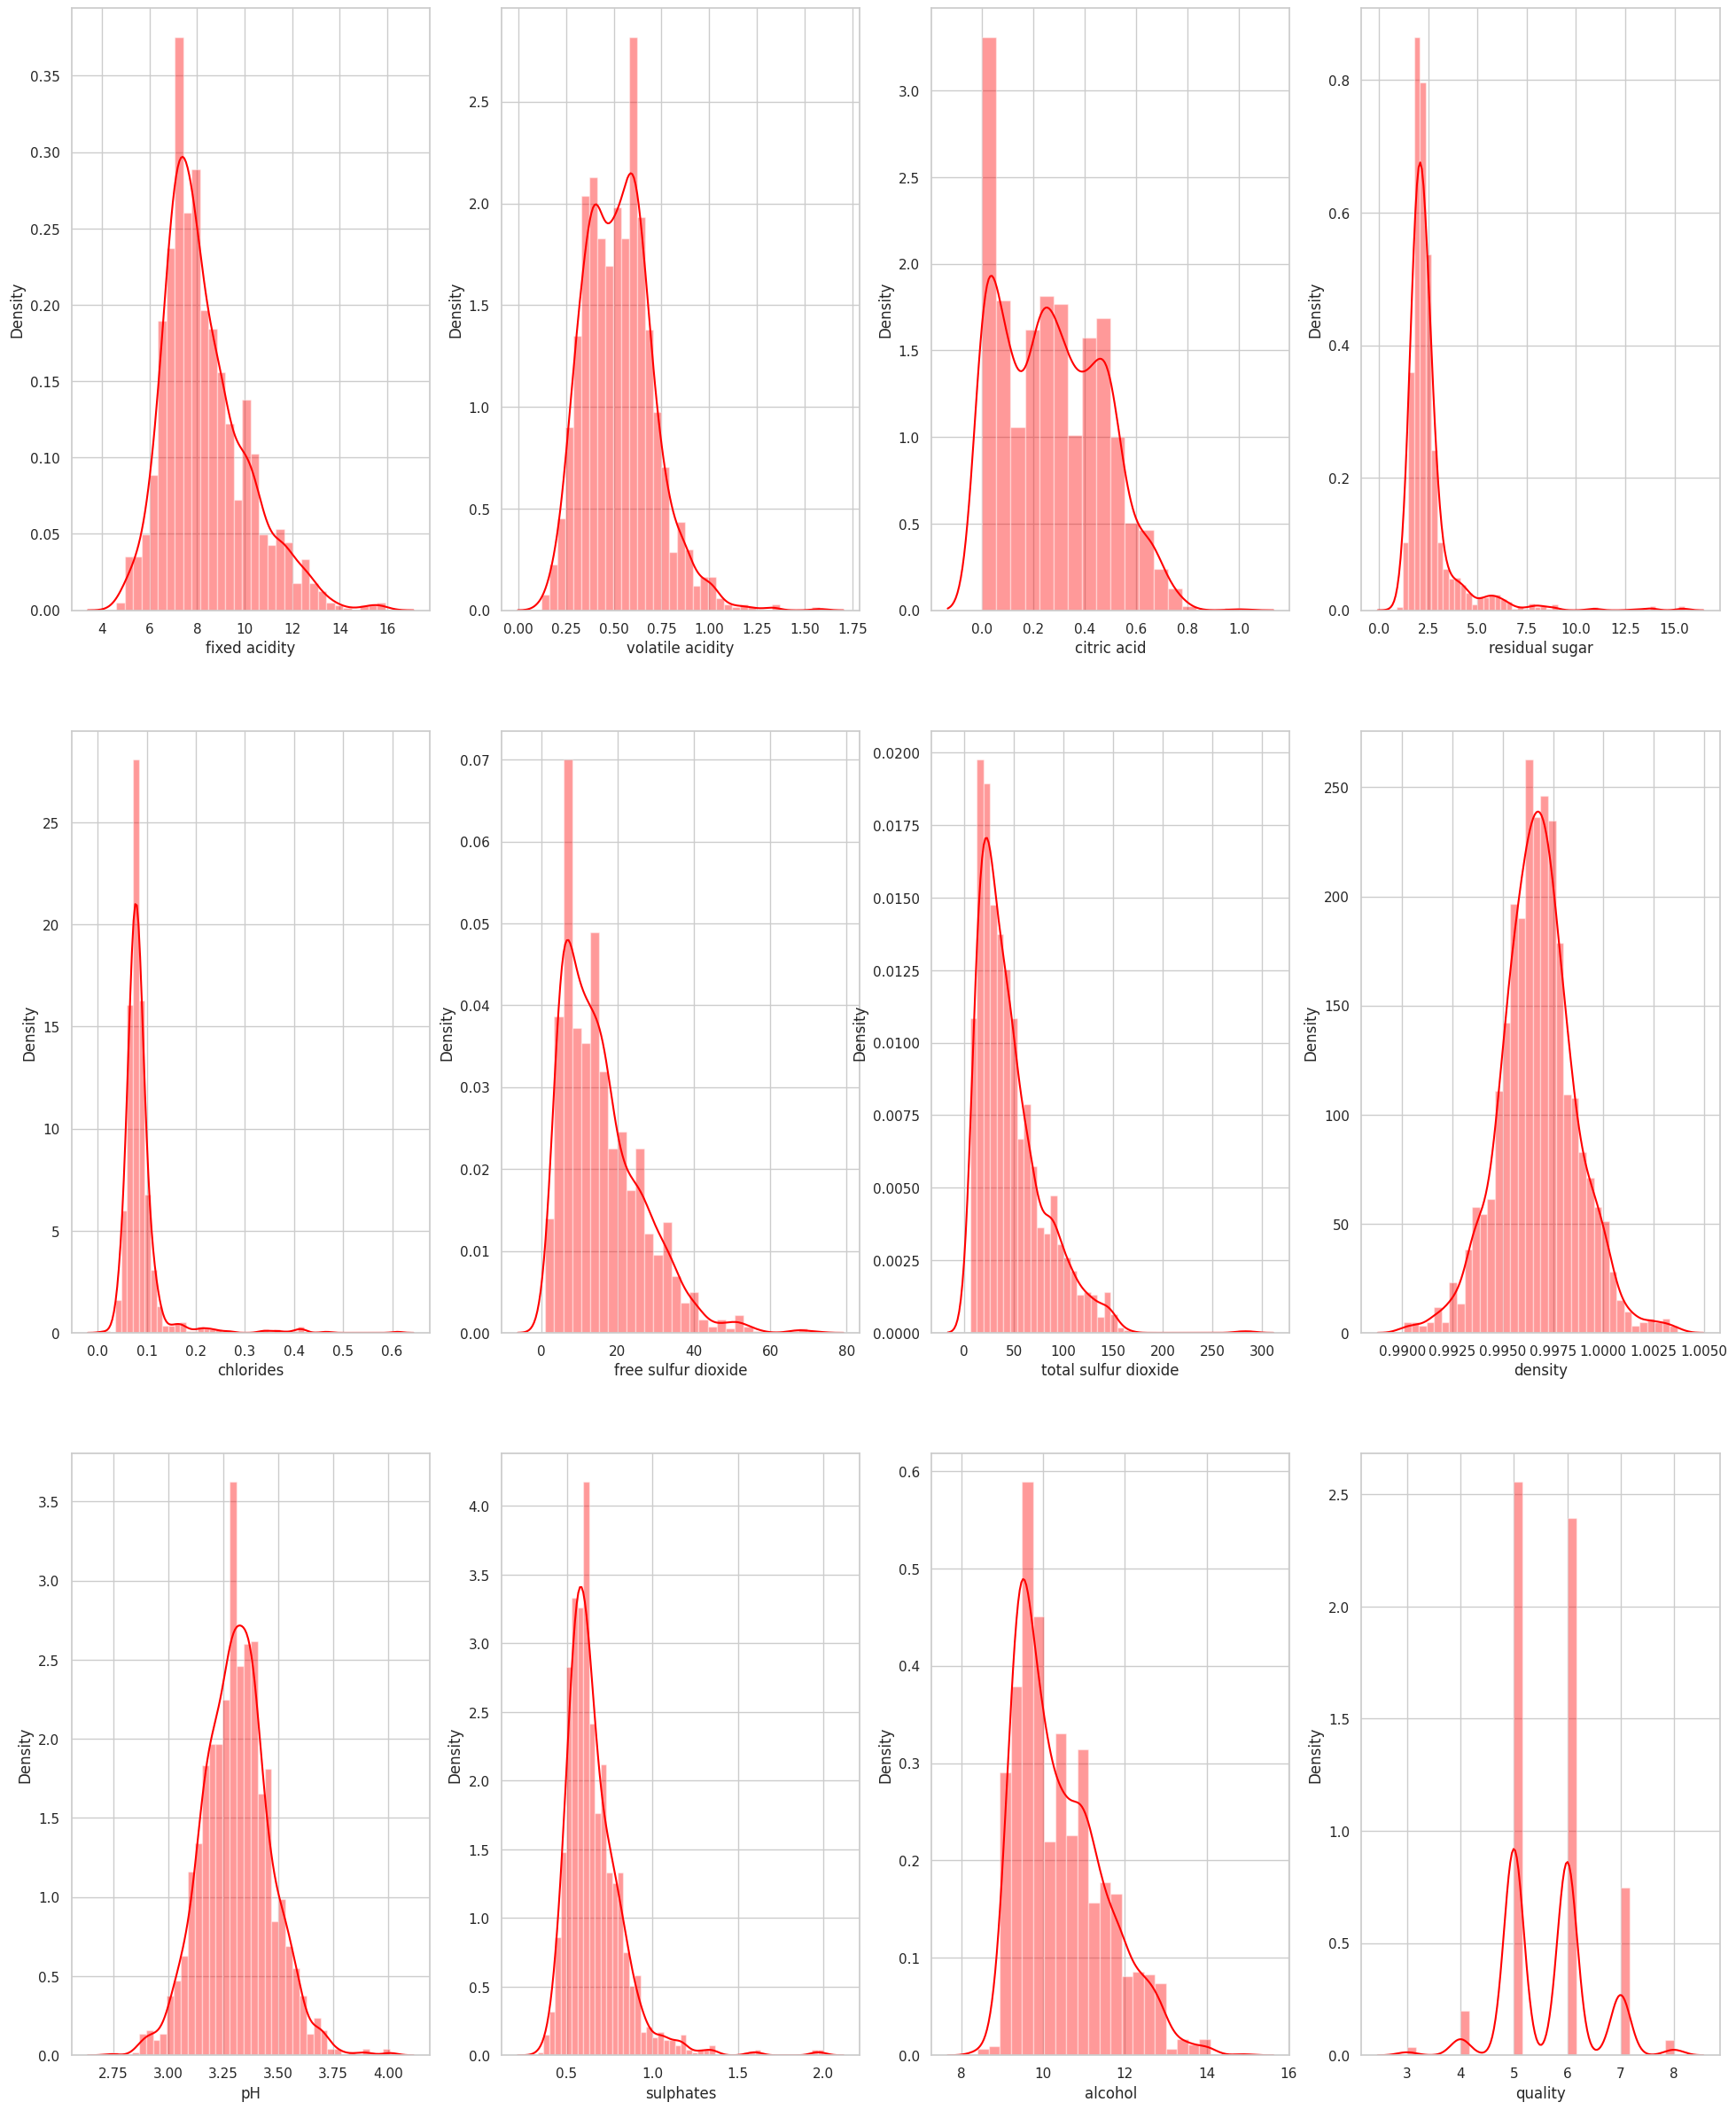

In [12]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(df[columns[k]], ax = ax1[i][j], color = 'red')
            k += 1

In [13]:
def log_transform(col):
    return np.log(col[0])

df['residual sugar'] = df[['residual sugar']].apply(log_transform, axis=1)
df['chlorides'] = df[['chlorides']].apply(log_transform, axis=1)
df['free sulfur dioxide'] = df[['free sulfur dioxide']].apply(log_transform, axis=1)
df['total sulfur dioxide'] = df[['total sulfur dioxide']].apply(log_transform, axis=1)
df['sulphates'] = df[['sulphates']].apply(log_transform, axis=1)

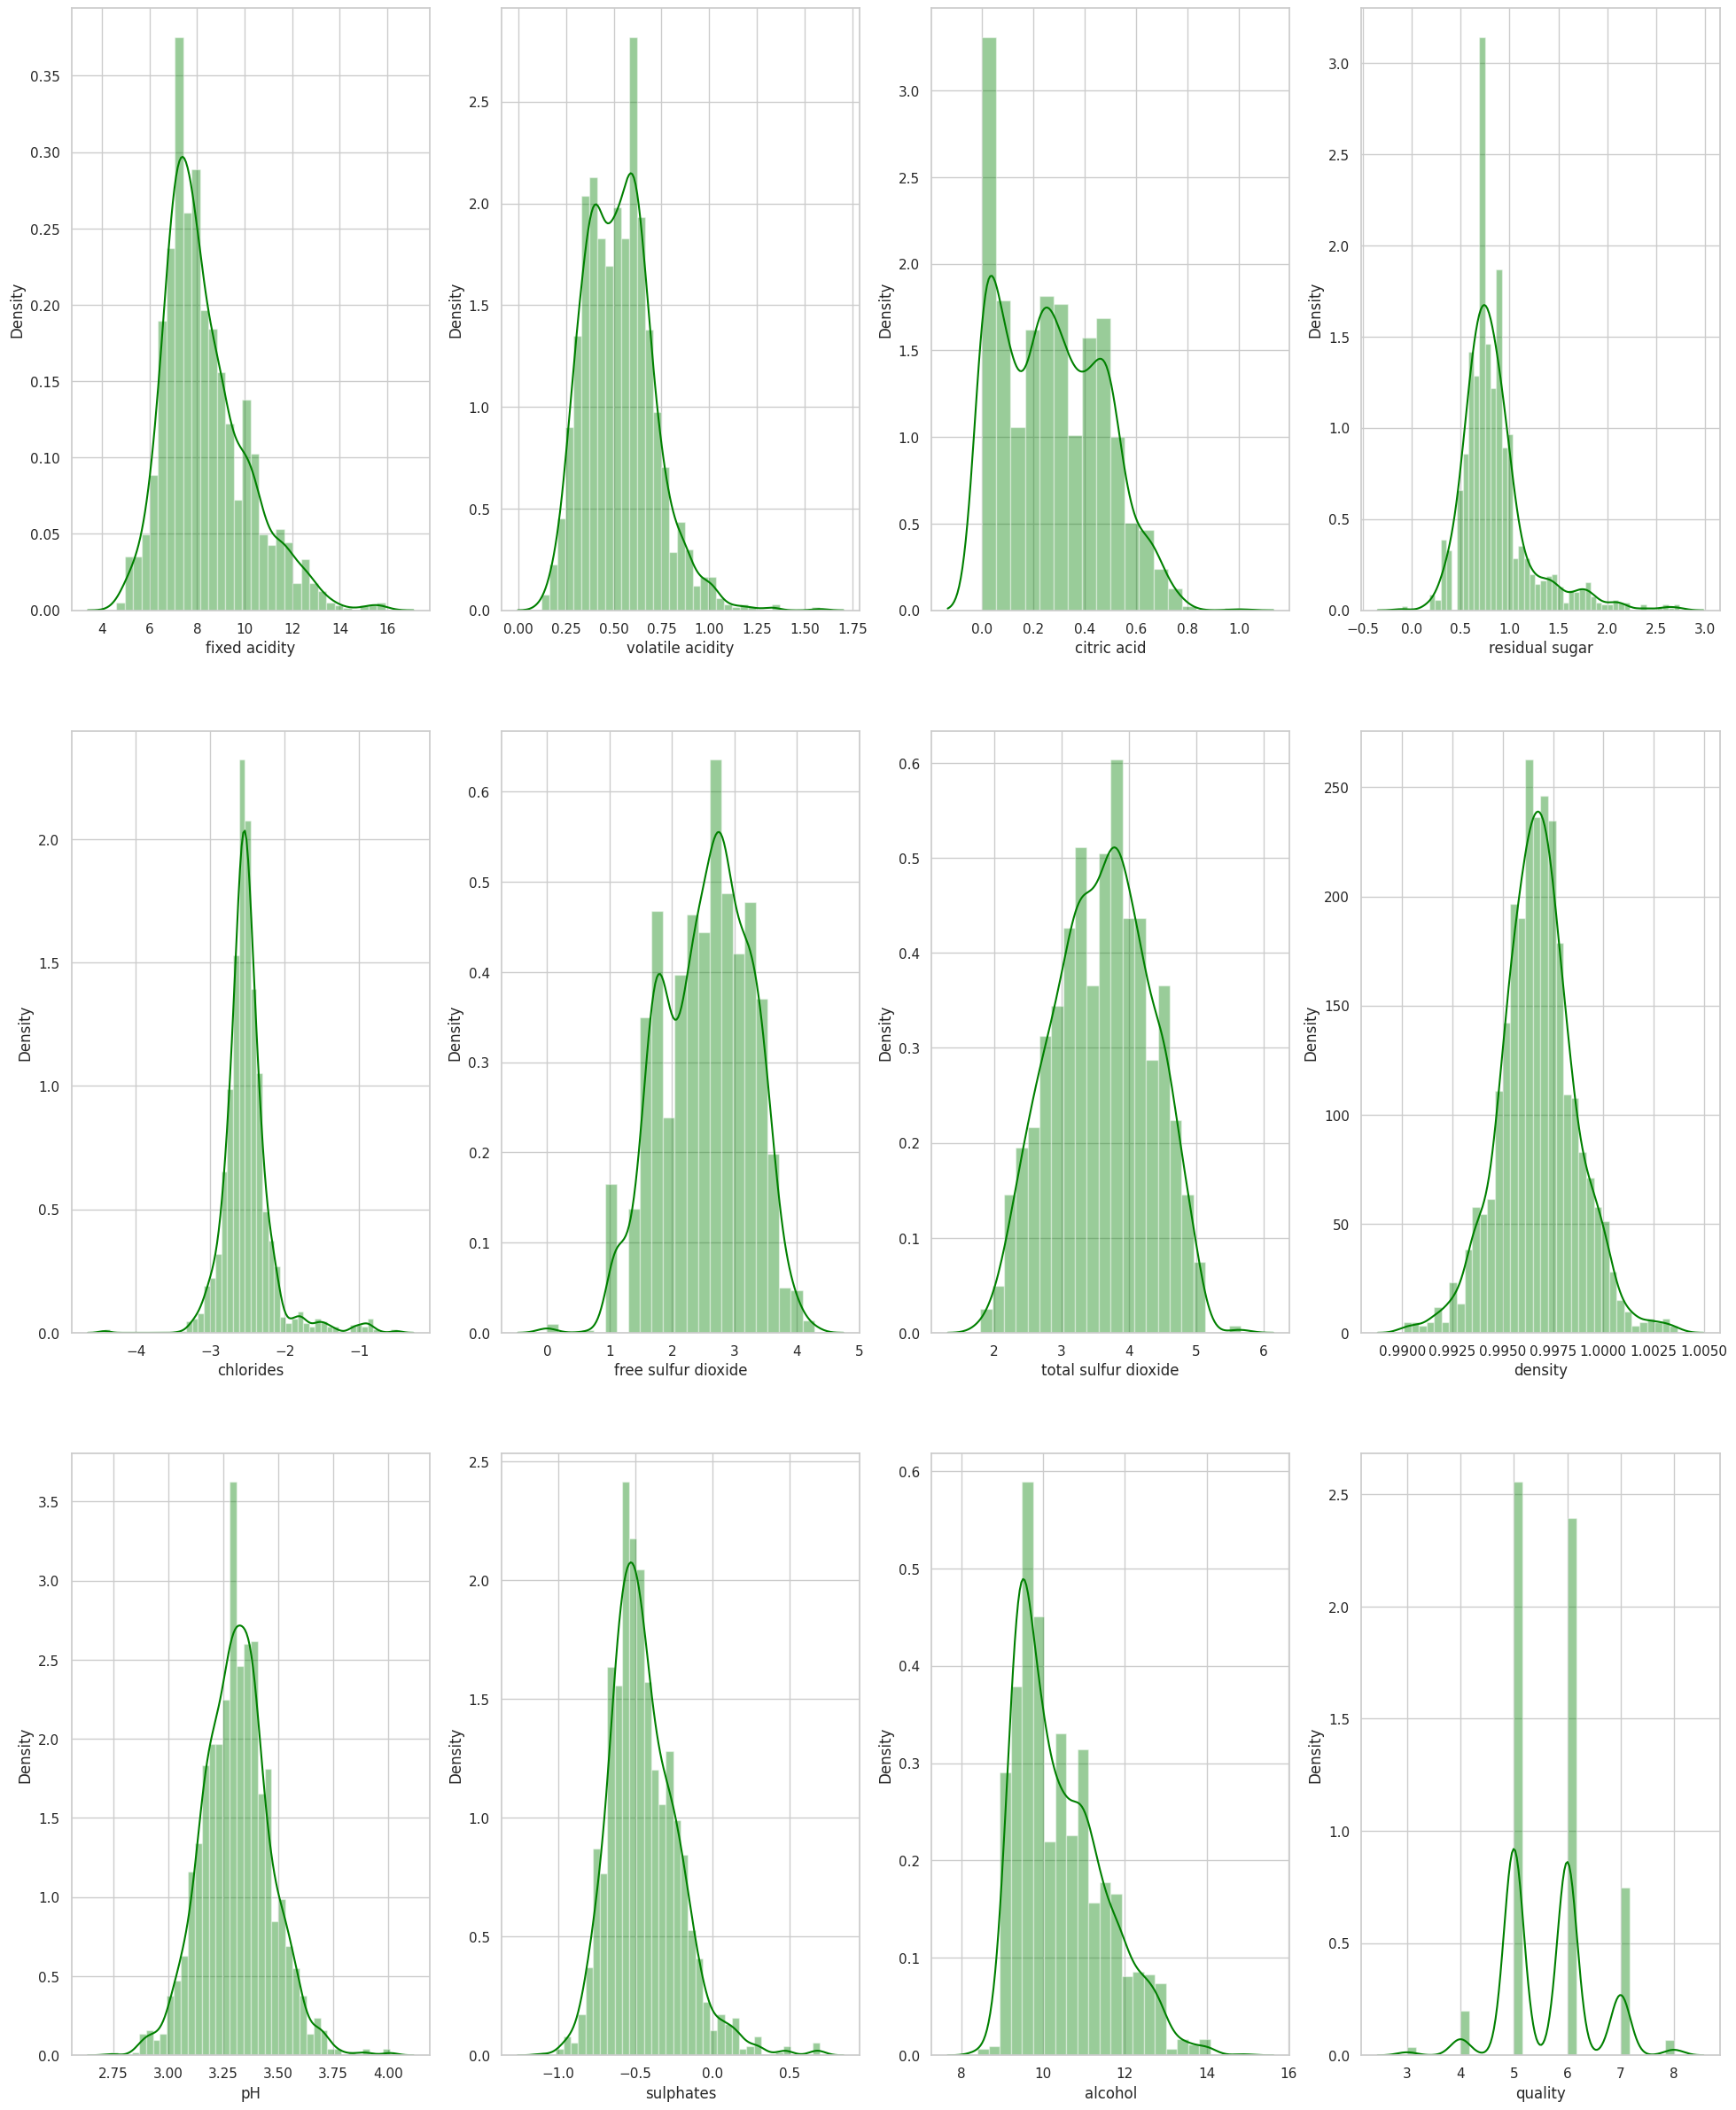

In [14]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(df[columns[k]], ax = ax1[i][j], color = 'green')
            k += 1
plt.show()

In [15]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.308642
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.023533
free sulfur dioxide    -0.050087
pH                     -0.057731
total sulfur dioxide   -0.170143
density                -0.174919
chlorides              -0.176140
volatile acidity       -0.390558
Name: quality, dtype: float64

In [18]:
df_3 = df[df.quality==3]     # MINORITY          
df_4 = df[df.quality==4]     # MINORITY          
df_5 = df[df.quality==5]     # MAJORITY
df_6 = df[df.quality==6]     # MAJORITY
df_7 = df[df.quality==7]     # MINORITY
df_8 = df[df.quality==8]     # MINORITY

In [19]:
from sklearn.utils import resample

df_3_upsampled = resample(df_3, replace=True, n_samples=600, random_state=12) 
df_4_upsampled = resample(df_4, replace=True, n_samples=600, random_state=12) 
df_7_upsampled = resample(df_7, replace=True, n_samples=600, random_state=12) 
df_8_upsampled = resample(df_8, replace=True, n_samples=600, random_state=12) 

# Decreases the rows of Majority one's to make balance data :
df_5_downsampled = df[df.quality==5].sample(n=600).reset_index(drop=True)
df_6_downsampled = df[df.quality==6].sample(n=600).reset_index(drop=True)


In [20]:
Balanced_df = pd.concat([df_3_upsampled, df_4_upsampled, df_7_upsampled, 
                         df_8_upsampled, df_5_downsampled, df_6_downsampled]).reset_index(drop=True)


# Display new class counts
Balanced_df.quality.value_counts()

quality
3    600
4    600
7    600
8    600
5    600
6    600
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

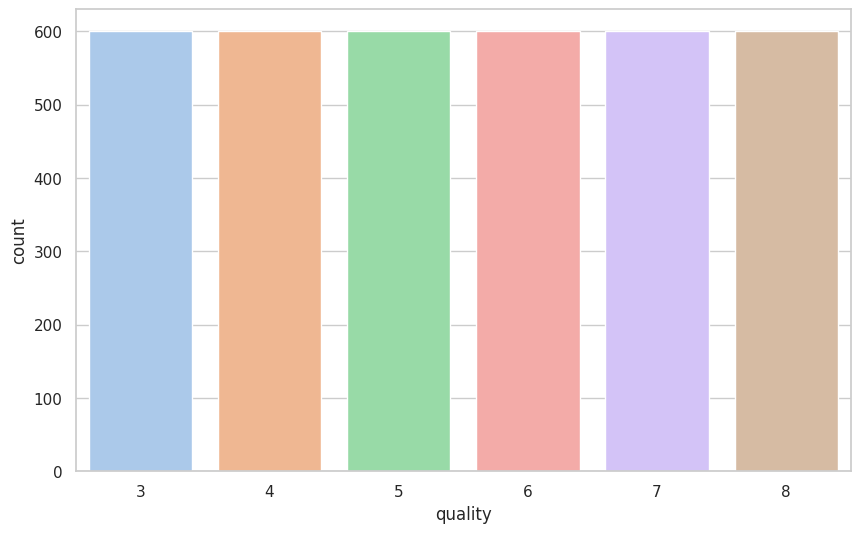

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='quality', data=Balanced_df, order=[3, 4, 5, 6, 7, 8], palette='pastel')

<Axes: xlabel='quality', ylabel='alcohol'>

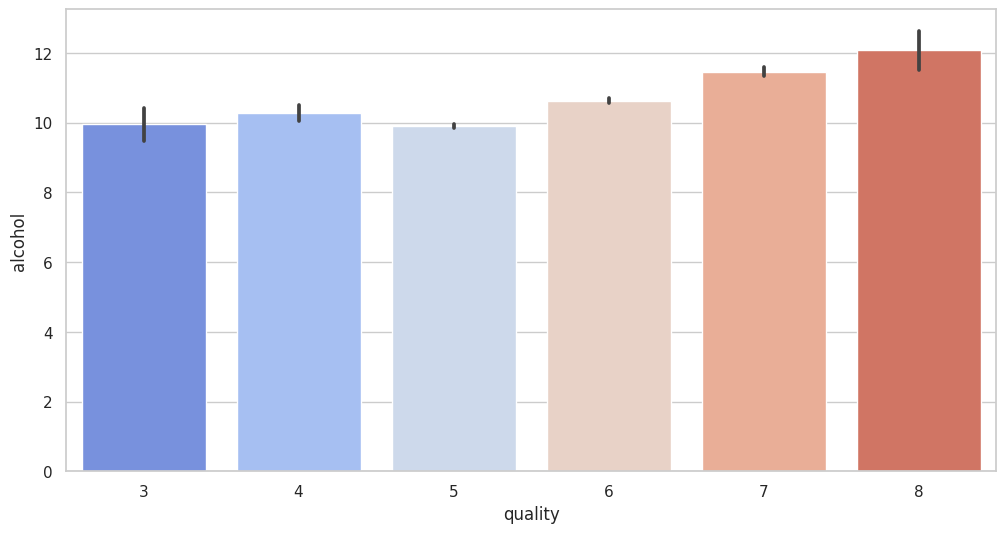

In [22]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'coolwarm')

Text(0, 0.5, 'Features')

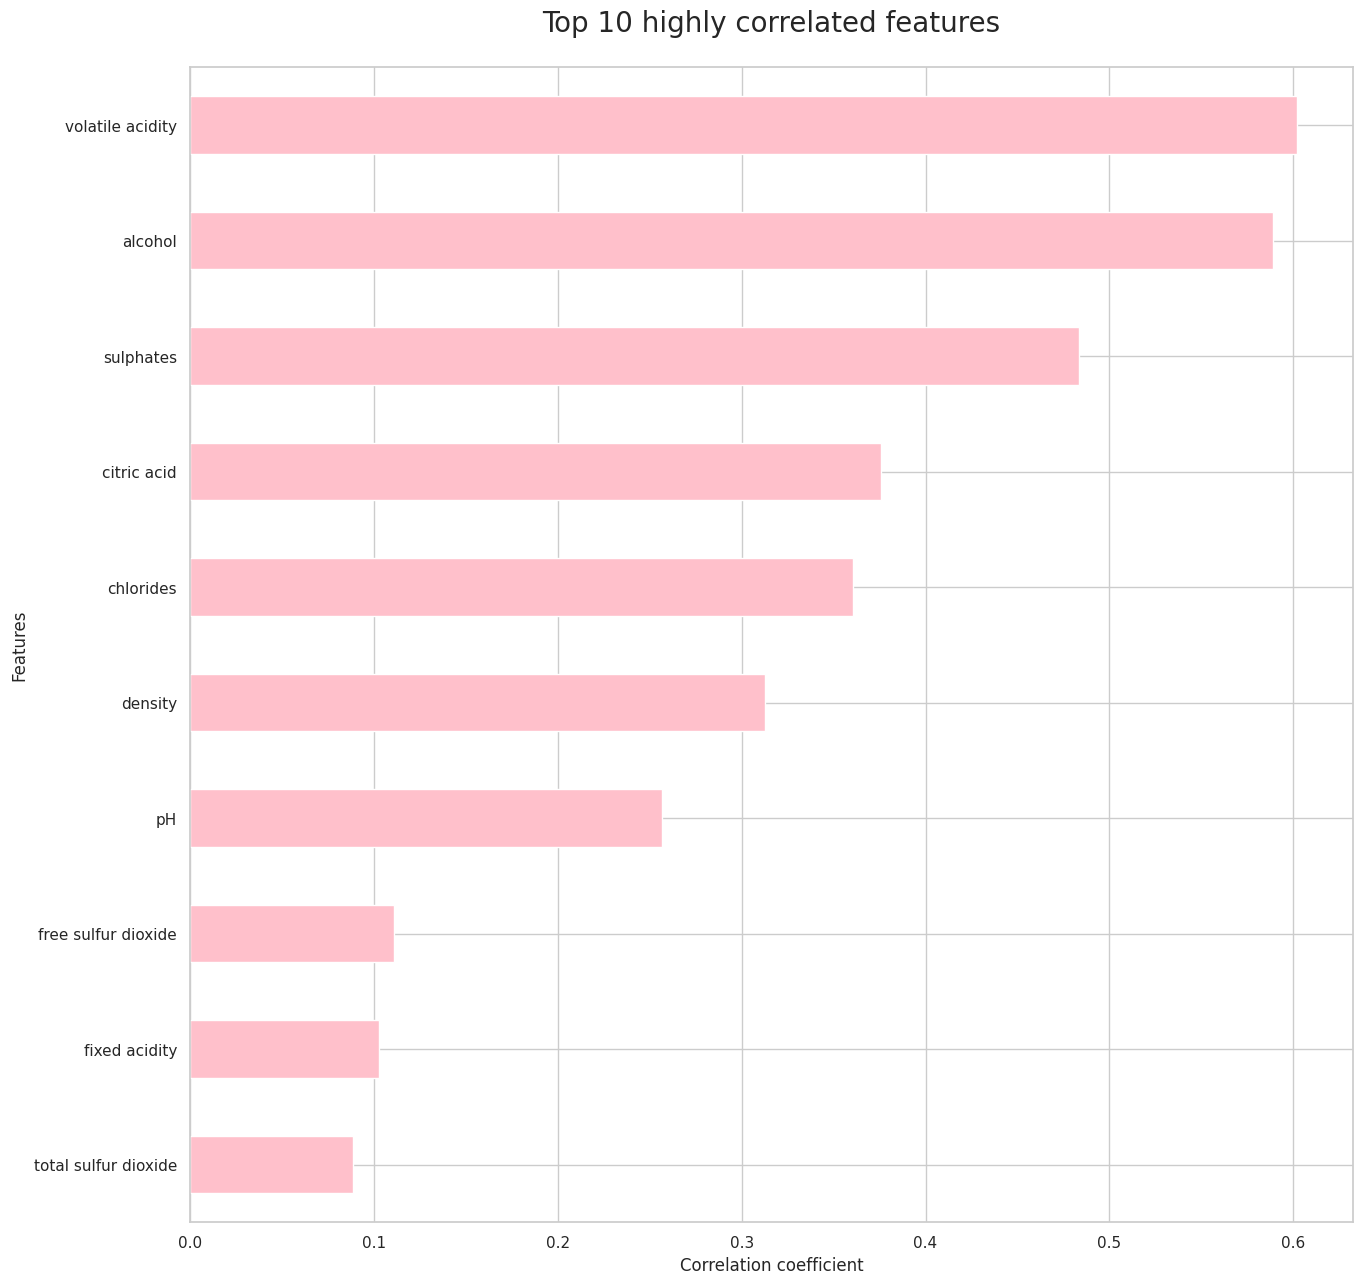

In [23]:
plt.figure(figsize=(15,15))
Balanced_df.corr().quality.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:11][::-1].plot(kind='barh',color='pink') 
# calculating the top 10 highest correlated features
# with respect to the target variable i.e. "quality"
plt.title("Top 10 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

In [24]:
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
                     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
                     'sulphates', 'alcohol']

In [25]:
X = Balanced_df[selected_features]
y = Balanced_df.quality

In [26]:
from sklearn.model_selection import train_test_split

# Splitting the data into 70% and 30% to construct Training and Testing Data respectively.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=13)

In [27]:
from sklearn.neighbors import KNeighborsClassifier  
# For weights = 'uniform'
for n_neighbors in [5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors)
    model.fit(X_train, y_train) 
    scr = model.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

For n_neighbors =  5  score is  0.8157407407407408
For n_neighbors =  10  score is  0.762962962962963
For n_neighbors =  15  score is  0.7157407407407408
For n_neighbors =  20  score is  0.6842592592592592


In [28]:
for n_neighbors in [5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors, weights='distance')
    model.fit(X_train, y_train) 
    scr = model.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

For n_neighbors =  5  score is  0.8666666666666667
For n_neighbors =  10  score is  0.8444444444444444
For n_neighbors =  15  score is  0.8435185185185186
For n_neighbors =  20  score is  0.8444444444444444


In [29]:
KNN_Model = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Train the model using the training set
KNN_Model.fit(X_train, y_train) 
results = KNN_Model.fit(X_train, y_train)

In [30]:
KNN_train_predictions = KNN_Model.predict(X_train)

In [31]:
KNN_test_predictions = KNN_Model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print("\n Train Data: KNN_Confusion Matrix:\n ")
print(confusion_matrix(y_train, KNN_train_predictions))

print("\n Train Data: KNN_Classification Report:\n ")
print(classification_report(y_train, KNN_train_predictions))

print("\n \n Test Data: KNN_Confusion Matrix: \n ")
print(confusion_matrix(y_test, KNN_test_predictions))

print("\n Test Data: KNN_Classification Report:\n ")
print(classification_report(y_test, KNN_test_predictions))


 Train Data: KNN_Confusion Matrix:
 
[[422   0   0   0   0   0]
 [  0 392   0   0   0   0]
 [  0   0 423   0   0   0]
 [  0   0   0 436   0   0]
 [  0   0   0   0 423   0]
 [  0   0   0   0   0 424]]

 Train Data: KNN_Classification Report:
 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       422
           4       1.00      1.00      1.00       392
           5       1.00      1.00      1.00       423
           6       1.00      1.00      1.00       436
           7       1.00      1.00      1.00       423
           8       1.00      1.00      1.00       424

    accuracy                           1.00      2520
   macro avg       1.00      1.00      1.00      2520
weighted avg       1.00      1.00      1.00      2520


 
 Test Data: KNN_Confusion Matrix: 
 
[[178   0   0   0   0   0]
 [  0 208   0   0   0   0]
 [  0  15 119  33   9   1]
 [  0  14  29  84  32   5]
 [  0   3   1   2 171   0]
 [  0   0   0   0   0 176]]

 Test Dat